# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [32]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

In [33]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 1e1
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

In [35]:
f1 = lambda x: np.sign(x) * x + x ** 2
f2 = lambda x: np.sign(x) * x ** 2
f3 = lambda x: abs(np.sin(5 * x)) ** 3
f4_1 = lambda x: 1 / (1 + (x ** 2))
f4_2 = lambda x: 1 / (1 + 25 * (x ** 2))
f4_3 = lambda x: 1 / (1 + 100 * (x ** 2))
f5 = lambda x: np.sign(x)

n = [10, 100, 1000, 10000]
x = np.linspace(-1, 1, 1000)

inter = []
nodes = []
weights = []
f1_n = []
inter_s = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f1_n.append(f1(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f1_n[i], weights[i], x))
    inter_s.append(barycentric_interpolate(nodes[i], f1_n[i], x))

time_avg_s = np.zeros((len(n)))
time_std_dev_s = np.zeros((len(n)))
print('Pomiar czasu dla funkcji z modułu scipy:')
for i in range(len(n)):
    print('N: ', n[i])
    print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(nodes[i], f1_n[i], x)
    time_avg_s[i] = saved_timing.average
    time_std_dev_s[i] = saved_timing.stdev
    print('---------------------------------------------------------')

time_avg = np.zeros((len(n)))
time_std_dev = np.zeros((len(n)))
print('Pomiar czasu dla funkcji z laboratorium:')
for i in range(len(n)):
    print('N: ', n[i])
    print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(nodes[i], f1_n[i], weights[i], x)
    time_avg[i] = saved_timing.average
    time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------------------')

Pomiar czasu dla funkcji z modułu scipy:
N:  10
Czas wykonania: 
668 µs ± 76 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  100
Czas wykonania: 
2.98 ms ± 80.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  1000
Czas wykonania: 
36.9 ms ± 2.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  10000
Czas wykonania: 
1.02 s ± 11.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
Pomiar czasu dla funkcji z laboratorium:
N:  10
Czas wykonania: 
7.1 ms ± 833 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  100
Czas wykonania: 
15.7 ms ± 401 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N

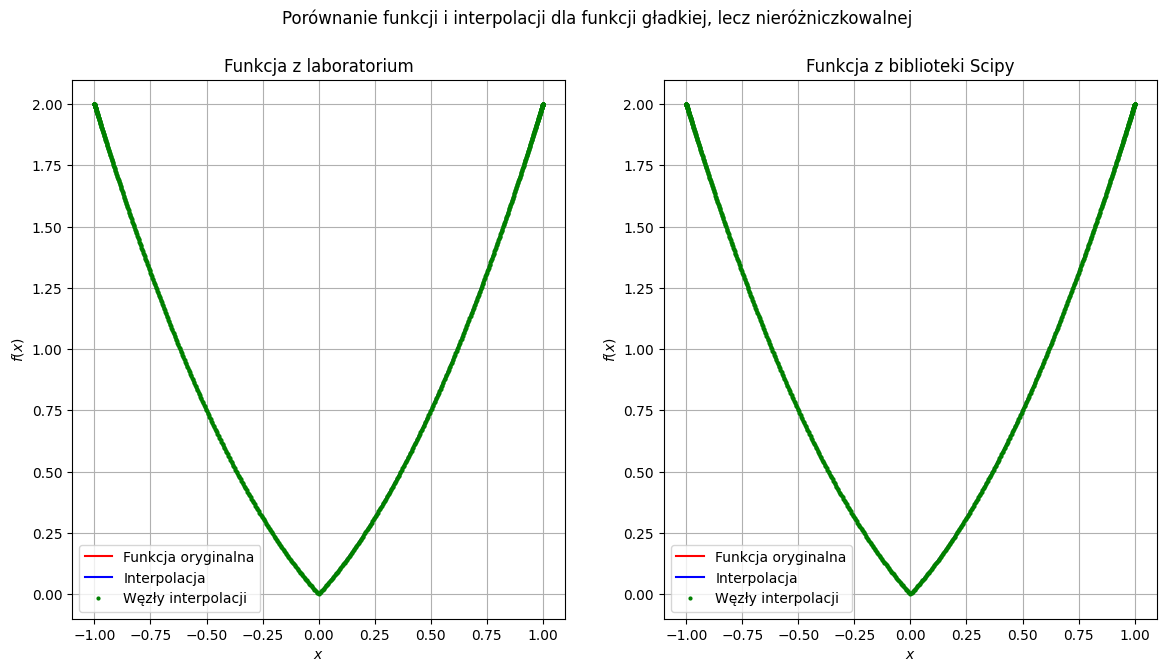

In [36]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle('Porównanie funkcji i interpolacji dla funkcji gładkiej, lecz nieróżniczkowalnej')

# Wykres dla funkcji z laboratorium
ax1.plot(x, f1(x), 'r', label='Funkcja oryginalna')
ax1.plot(x, inter[2], 'b', label='Interpolacja')
ax1.plot(nodes[2], f1(nodes[2]), 'go', label='Węzły interpolacji', markersize=2)
ax1.set(xlabel='$x$', ylabel='$f(x)$')
ax1.set_title('Funkcja z laboratorium')
ax1.legend()
ax1.grid()

# Wykres dla funkcji z biblioteki Scipy
ax2.plot(x, f1(x), 'r', label='Funkcja oryginalna')
ax2.plot(x, inter_s[2], 'b', label='Interpolacja')
ax2.plot(nodes[2], f1(nodes[2]), 'go', label='Węzły interpolacji', markersize=2)
ax2.set(xlabel='$x$', ylabel='$f(x)$')
ax2.set_title('Funkcja z biblioteki Scipy')
ax2.legend()
ax2.grid()


Wnioski:
Funkcja zaimplementowana przeze mnie działa w niemal identyczny sposób jak ta z biblioteki scipy. Dla małych n, czas wykonania tych funkcji znacząco wskazuje na przewagę funkcji z biblioteki scipy, jednakże ta różnica maleje wraz ze wzrostem rzędu interpolacji. Ze względu na długi czas wykonania interpolacji rzędu 100000 nie wykonałem jej.

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

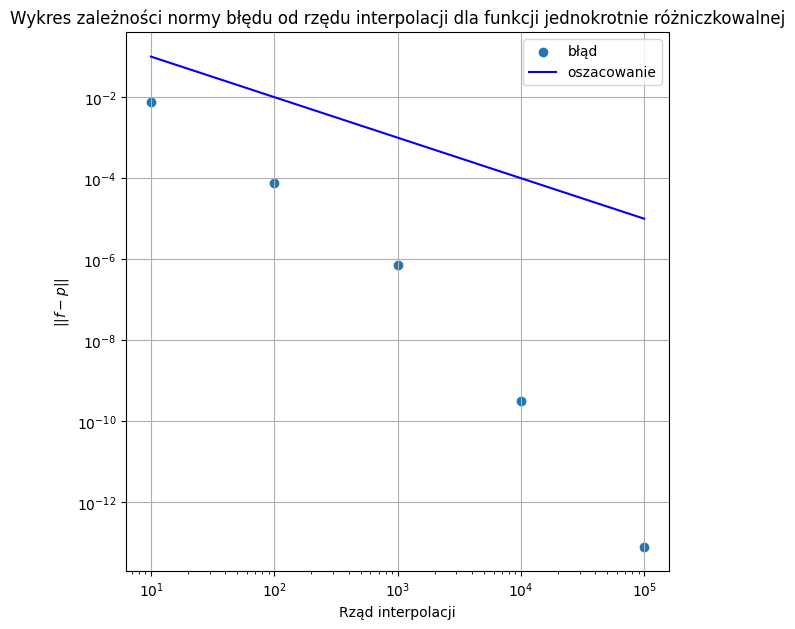

In [37]:
x = np.linspace(-0.9, 0.9, 1000)

inter = []
nodes = []
weights = []
f2_n = []
l_inf1 = []
y2 = f2(x)
n_v = []
n = [10,100,1000,10000,100000]

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f2_n.append(f2(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f2_n[i], weights[i], x))
    l_inf1.append(main.L_inf(y2, inter[i]))
    n_v.append(1 / n[i])

fig3, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_inf1, label='błąd')
ax.plot(n, n_v, 'b', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='$||f-p||$')
ax.grid()
ax.set_title('Wykres zależności normy błędu od rzędu interpolacji dla funkcji jednokrotnie różniczkowalnej');

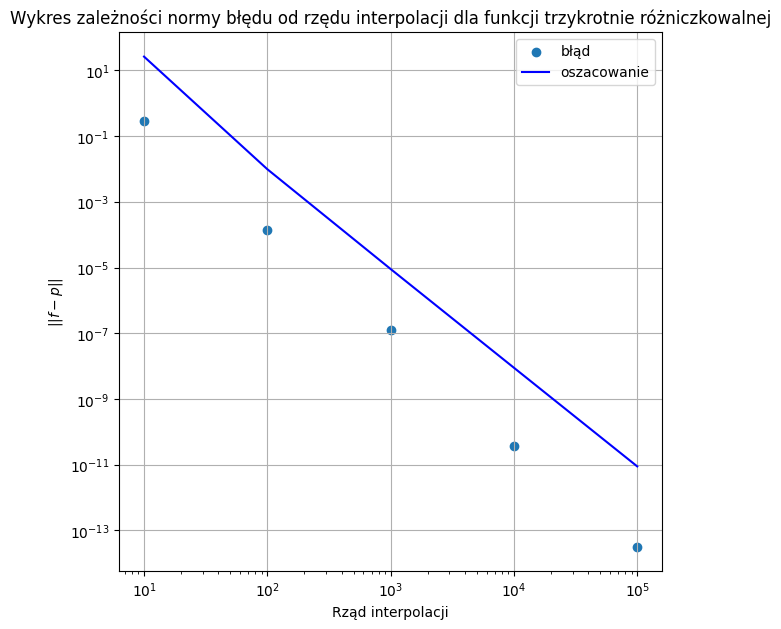

In [ ]:
inter = []
nodes = []
weights = []
f3_n = []
l_inf2 = []
y3 = f3(x)
n_v = []
n = [10,100,1000,10000,100000]

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f3_n.append(f3(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f3_n[i], weights[i], x))
    l_inf2.append(main.L_inf(y3, inter[i]))
    n_v.append(4 * 2.102e4 / 3 / np.pi / (n[i] - 3) ** 3)

fig4, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_inf2, label='błąd')
ax.plot(n, n_v, 'b', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='$||f-p||$')
ax.grid()
ax.set_title('Wykres zależności normy błędu od rzędu interpolacji dla funkcji trzykrotnie różniczkowalnej');

Wnioski:
Wnioski z analizy wykresów są dość jednoznaczne: im wyższy rząd interpolacji, tym lepiej odwzorowana jest funkcja interpolacyjna. Zwiększająca się liczba węzłów idzie w parze z poprawą jakości interpolacji.

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

In [ ]:
n = list(range(1, 51))
x = np.linspace(-0.9, 0.9, 1000)
y5 = f5(x)

nodes = [main.chebyshev_nodes(n_val) for n_val in n]
weights = [main.bar_czeb_weights(n_val) for n_val in n]
f5_n = [f5(node) for node in nodes]
inter = [main.barycentric_inte(nodes[i], f5_n[i], weights[i], x) for i in range(len(n))]

err_odd = [main.L_inf(y5, inter[i]) for i in range(len(n)) if n[i] % 2 != 0]
err_even = [main.L_inf(y5, inter[i]) for i in range(len(n)) if n[i] % 2 == 0]
n_odd = [n_val for n_val in n if n_val % 2 != 0]
n_even = [n_val for n_val in n if n_val % 2 == 0]


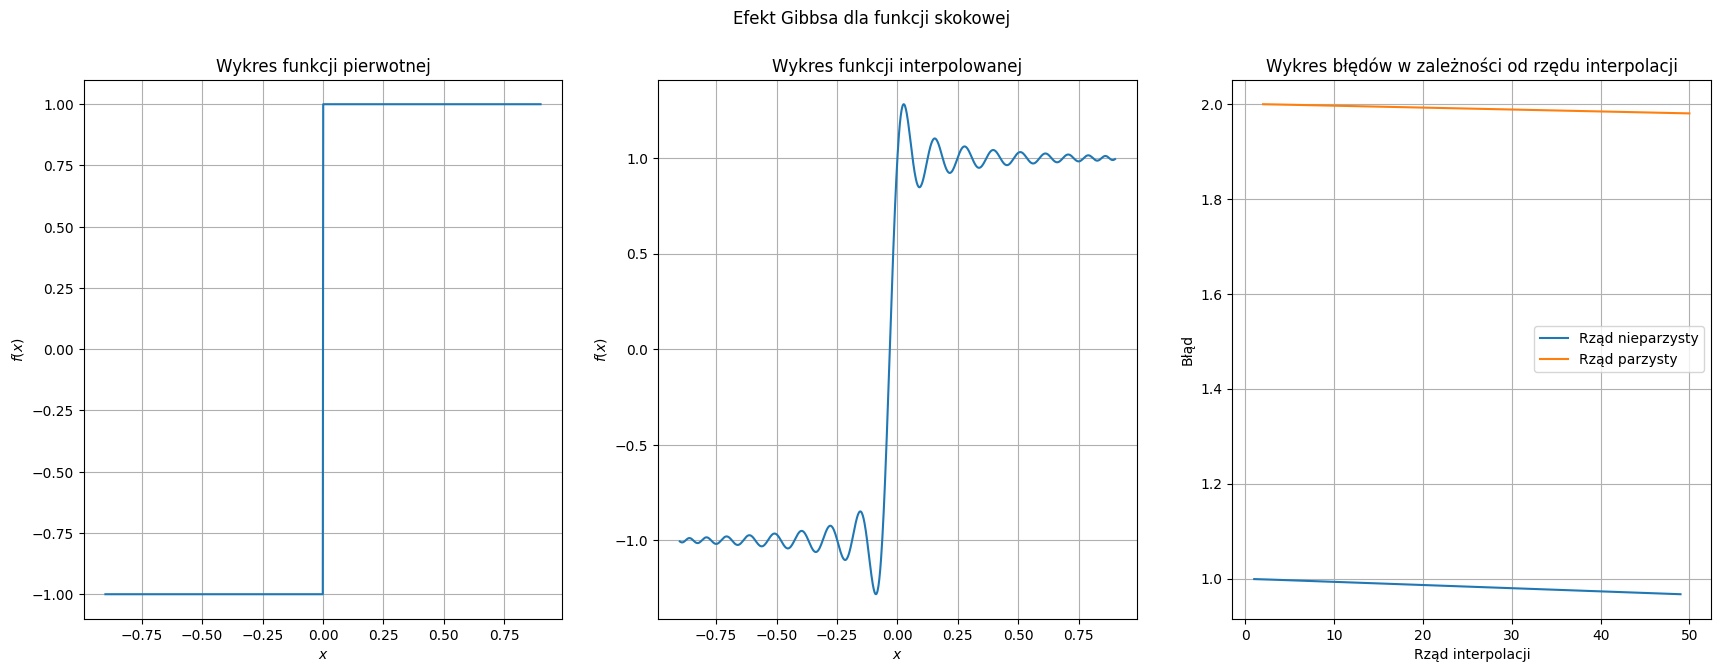

In [ ]:
fig5, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig5.suptitle('Efekt Gibbsa dla funkcji skokowej')

# Pierwszy wykres - funkcja podstawowa
ax1.plot(x, y5)
ax1.set(xlabel='$x$', ylabel='$f(x)$')
ax1.set_title('Wykres funkcji pierwotnej')
ax1.grid()

# Drugi wykres - funkcja interpolowana
ax2.plot(x, inter[49])
ax2.set(xlabel='$x$', ylabel='$f(x)$')
ax2.set_title('Wykres funkcji interpolowanej')
ax2.grid()

# Trzeci wykres - błędy w zależności od rzędu interpolacji
ax3.plot(n_odd, err_odd, label='Rząd nieparzysty')
ax3.plot(n_even, err_even, label='Rząd parzysty')
ax3.set(xlabel='Rząd interpolacji', ylabel='Błąd')
ax3.set_title('Wykres błędów w zależności od rzędu interpolacji')
ax3.grid()
ax3.legend()


Wnioski:
Kiedy interpolujemy funkcję nieciągłą, zauważamy Efekt Gibbsa, który charakteryzuje się pojawieniem się oscylacji w okolicach punktów, gdzie funkcja jest nieciągła. Te oscylacje prowadzą do niedokładnego odwzorowania funkcji, co jest widoczne na przedstawionych wykresach.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)